!/usrsr/bin/fenv python3.7<br>
-*- coding: utf-8 -*-

In [20]:
from urllib               import request
from collections          import Counter
from nltk                 import word_tokenize, FreqDist
from wordcloud            import WordCloud
from nltk.corpus          import stopwords

import numpy              as np
import matplotlib.pyplot  as plt
import random
import nltk
import requests

__author__ = "Christoph Hartleb"<br>
__copyright__ = "Copyright 2019"<br>
__credits__ = ["Christoph Hartleb"]<br>
__version__ = "1.0.1"<br>
__email__ = "14hartle@edu.uni-graz.at"<br>
__status__ = "Production"

In [6]:
URL = 'http://www.gutenberg.org/cache/epub/24681/pg24681.txt'

RESPONSE = request.urlopen(URL)
RAW = RESPONSE.read().decode('utf8')

for char in '-.,\n;:?=)(/&%$§"!)12345678':
    RAW = RAW.replace(char, ' ')

data = RAW
stopWords = set(stopwords.words('english'))
words = word_tokenize(data)
wordsFiltered = []
 
for w in words:
    if w not in stopWords:
        wordsFiltered.append(w)                   

# Generate a Wordcloud

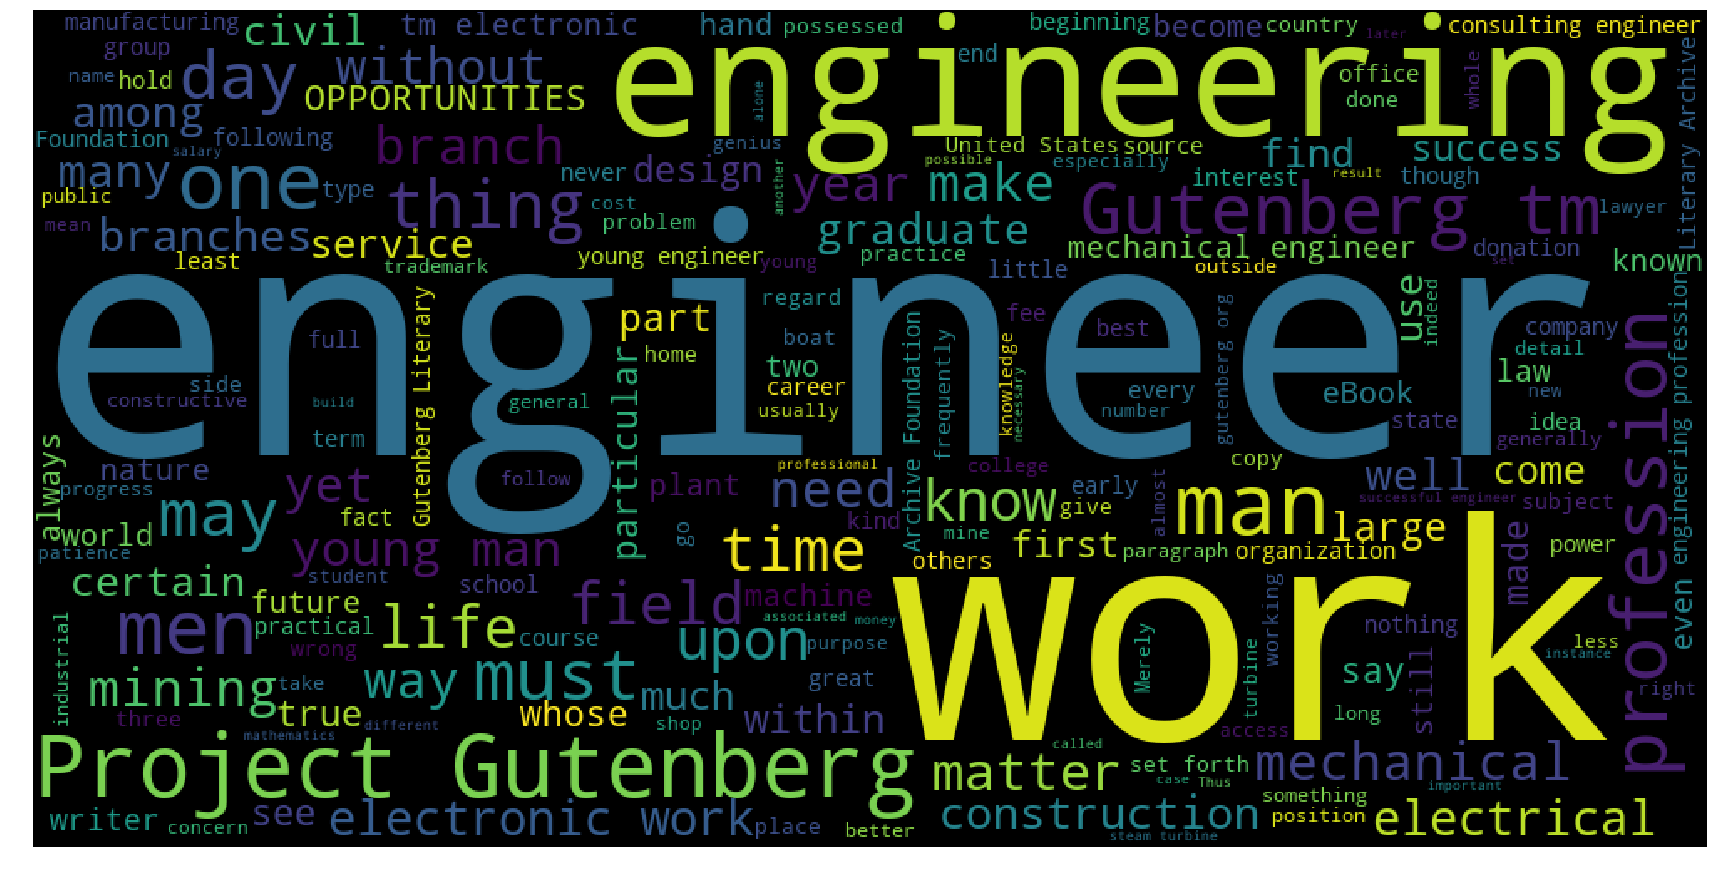

In [7]:
UNIQUE_STRING = (" ").join(wordsFiltered)
WORDCLOUD = WordCloud(width=1000, height=500).generate(UNIQUE_STRING)
plt.figure(figsize=(30, 16))
plt.imshow(WORDCLOUD)
plt.axis("off")
plt.show()

# Histogram

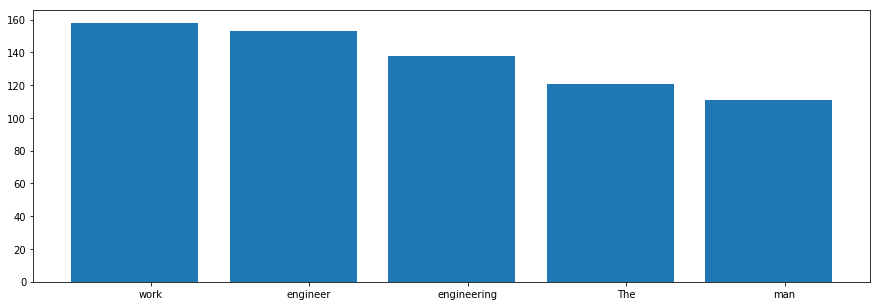

In [8]:
vocab_labels, vocab_values = zip(*Counter(wordsFiltered).items())  
                                                                                                                                                           
sorted_values = sorted(vocab_values)[::-1]
sorted_labels = [x for (y,x) in sorted(zip(vocab_values,vocab_labels))][::-1]  
indexes = np.arange(len(sorted_labels[:5]))                                    
width = 1                                                                                                                                                

plt.figure(figsize=(15, 5))
plt.bar(indexes, sorted_values[:5])
plt.xticks(indexes + width * 0.1, sorted_labels[:5])                                                                                    
plt.show()

# Wordoccureny in sentences

In [12]:
text = nltk.Text(wordsFiltered)
text_choosen = text.concordance(random.choice(text))

Displaying 1 of 1 matches:
tp www gutenberg org This Web site includes information Project Gutenberg tm i


# Lexical dispersion plot

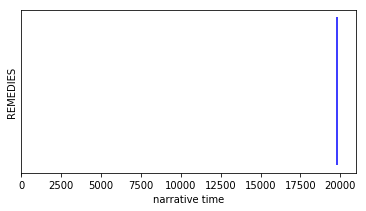

In [17]:
WORD = (random.choice(wordsFiltered))

x=list()
for i in range(0,len(words)):
    if words[i] == WORD:
        x.append(i)

fig, ax = plt.subplots()
ax.vlines(x, 0, 1, edgecolor="blue")
ax.set_xlim([0, len(words)])
ax.set_xlabel('narrative time')
ax.set_xticks([0],minor=True)
ax.set_ylabel(WORD)
ax.set_yticks([])
fig.set_figheight(3)

# Searching for word o

In [18]:
wordsFiltered.sort()

spec_letter = input("Your letter/sequence is: ")

print('\n')

for word in wordsFiltered:
    if spec_letter in word:
        print (word)

Your letter/sequence is: end


commended
depend
depending
depends
depends
descend
end
end
end
end
end
end
end
end
end
end
end
endeavor
endeavor
endeavor
endeavor
endless
endowments
ends
expend
extends
friend
friend
friendly
friendship
heartrending
intended
intended
render
send
sending
slender
spend
spend
spends
splendid
stupendous
superintendent
superintendent
tremendous


# Close file

In [19]:
RESPONSE.close()